In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
!pip install texthero -U
!pip install -U spacy
!pip install wordcloud
!pip install -U textblob
!python -m textblob.download_corpora

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import seaborn as sns
import texthero as hero
from texthero import stopwords
import os
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob,Word

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
dfdata = df['comment_text']
dflabels = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [ ]:
dflabels.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [ ]:
labels = dflabels.values.tolist()

In [ ]:
labels = np.array(labels)

In [ ]:
labels[6].sum()

4

In [ ]:
label = []
for row in labels:
  if row.sum() > 0:
    label.append(1)
  else:
    label.append(0)

In [ ]:
label = np.array(label, dtype = int)

In [ ]:
label[5]

0

In [ ]:
df['sentiment'] = label

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sentiment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [ ]:
df = df.drop(['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], axis=1)

In [ ]:
df.head()

,comment_text,sentiment
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [ ]:
df.loc[0]

comment_text    Explanation\nWhy the edits made under my usern...
sentiment                                                       0
Name: 0, dtype: object

In [ ]:
text = df['comment_text'].values.tolist()
labels = df['sentiment'].values.tolist()

In [ ]:
impwords = ['neurotypical', 'disorder', 'depression', 'spectrum', 'hearing', 'loss', 'visual', 'impairment', 'deficit', 'autism', 'allistic', 'disabled', 'enabled']
imptext = []
othtext = []
yimp = []
yoth = []
flag = 0
for i in range(len(text)):
  flag = 0
  for word in impwords:
    if text[i].find(word) == -1:
      continue
    else:
      imptext.append(text[i])
      yimp.append(labels[i])
      flag = 1
      break
  if flag == 0:
    othtext.append(text[i])
    yoth.append(labels[i])
text = []

In [ ]:
len(yimp)

1431

In [ ]:
len(imptext)

1431

In [ ]:
import random 
for i in range(48569):
  num = random.randint(0, 158139-i)
  imptext.append(othtext[num])
  yimp.append(yoth[num])
  othtext.pop(num)
  yoth.pop(num)

In [ ]:
y = np.array(yimp, dtype = int)
y.sum()

5061

In [ ]:
df = pd.DataFrame(list(zip(imptext, y)), columns =['text', 'sentiment'])

In [ ]:
df.head()

,text,sentiment
0,"""\n\nNot at all, you are making a straw man ar...",0
1,"06, 29 December 2007 (UTC)\nYep. LOL, the [[Re...",0
2,friesers opinion is simple i guess. kursk was ...,0
3,"""\n\nPlease see ref 1, 4 , 5 & 6 of this artic...",0
4,"""==Deletion of Account==\n\nOk Blueboy, """"Edit...",0


In [ ]:
nltk.download('words')
from nltk.corpus import words

def lemma_per_pos(sent):
  t = TextBlob(sent)
  t_dict = {"J": 'a',"N": 'n',"V": 'v',"R": 'r'}
  w_n_t = [(w, t_dict.get(p[0], 'n')) for w, p in t.tags]
  setofwords = set(words.words())
  # lemmatized_list = [w.lemmatize(t) for w, t in w_n_t if w in setofwords]
  lemmatized_list = [w.lemmatize(t) for w, t in w_n_t]
  return " ".join(lemmatized_list)

def df_preprocessing(df,col_name):
  default_stopwords = stopwords.DEFAULT
  custom_stopwords = default_stopwords.union(set(["UTC","talk"]))
  df[col_name]=[text.replace('<br','') for text in df[col_name]]
  df[col_name]= (df[col_name].pipe(hero.clean).pipe(hero.remove_html_tags).pipe(hero.remove_brackets).pipe(hero.remove_urls))
  df[col_name]= [lemma_per_pos(sent) for sent in df[col_name]]
  df[col_name]=hero.remove_stopwords(df[col_name],custom_stopwords)
  return df
  

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
nltk.download('omw-1.4')
df = df_preprocessing(df, "text")
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,text,sentiment
0,make straw man argument never claim donohue po...,0
1,december utc yep lol reformist party serbia re...,0
2,friesers opinion simple guess kursk turn point...,0
3,please see ref article mention wikipedia young...,0
4,deletion account ok blueboy edit l31 g0ng l41 ...,0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving toxiccomments.csv to toxiccomments.csv


In [ ]:
df = pd.read_csv('toxiccomments.csv')

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(49974, 3)

In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 8)

<Figure size 1152x576 with 0 Axes>

Max length: 1250, Min length: 1, Average Length :  35.91639652619362


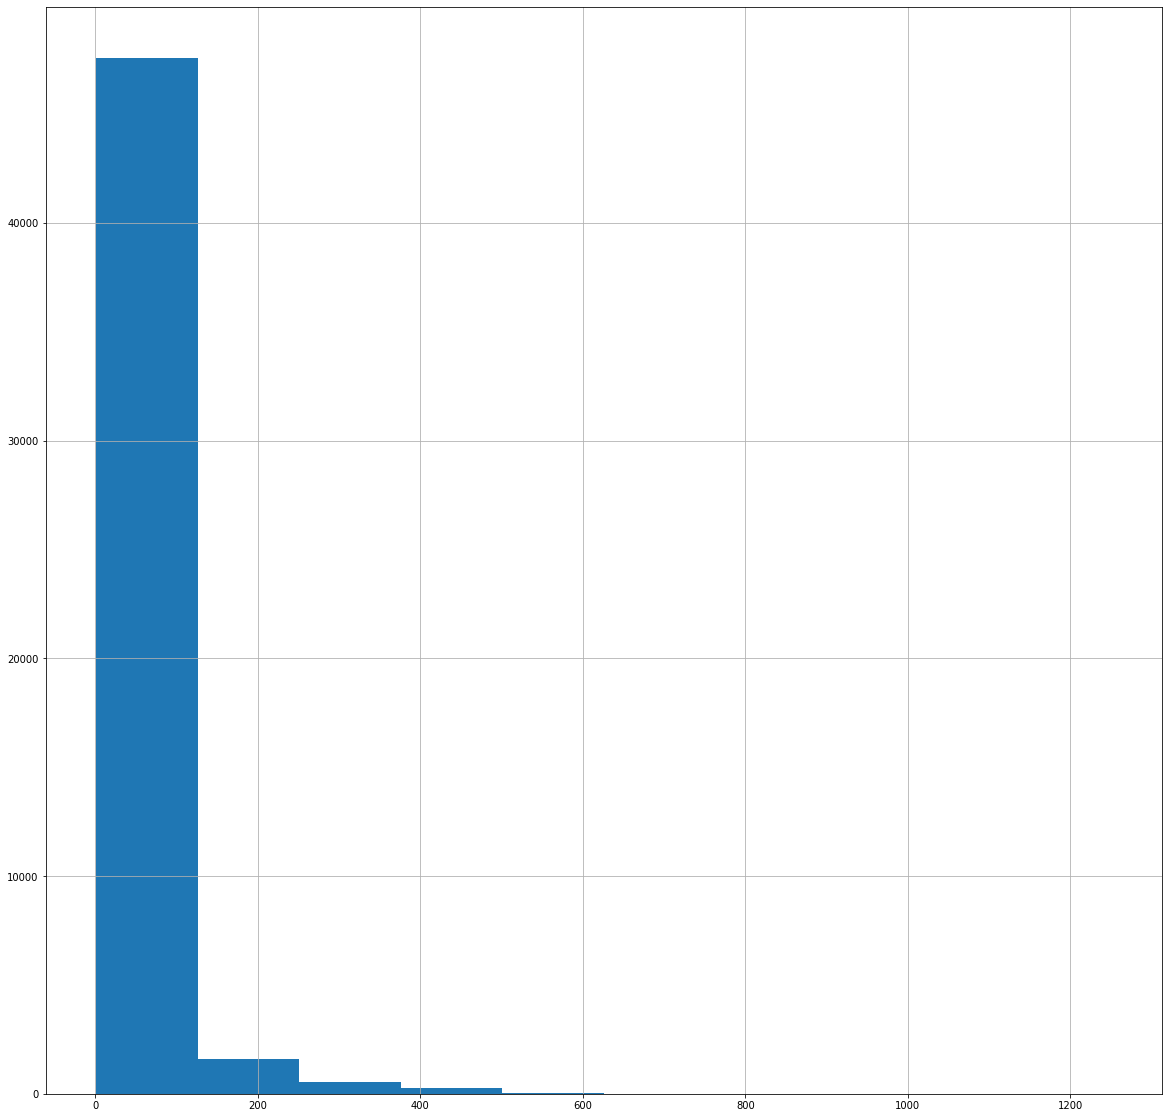

In [ ]:
df['len']= df['text'].str.split().map(lambda x: len(x))
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(df['len']),min(df['len']),df['len'].mean()))
fig = plt.figure()
fig.set_size_inches(20, 20)
df['len'].hist()

In [ ]:
text= ' '.join(t for t in df['text'])
words_list= text.split()
word_freq= dict()
for word in set(words_list):
  word_freq[word] = 0
for word in words_list:
  word_freq[word] += 1   
df_word= pd.DataFrame(word_freq.items(),columns=['word','count'])
df_word['word_len']= df_word['word'].map(lambda x: len(x))
df_word=df_word.sort_values('count',ascending=False).reset_index(drop=True)
df_word.head()

,word,count,word_len
0,article,24059,7
1,page,18062,4
2,wikipedia,15155,9
3,use,10316,3
4,edit,9973,4


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


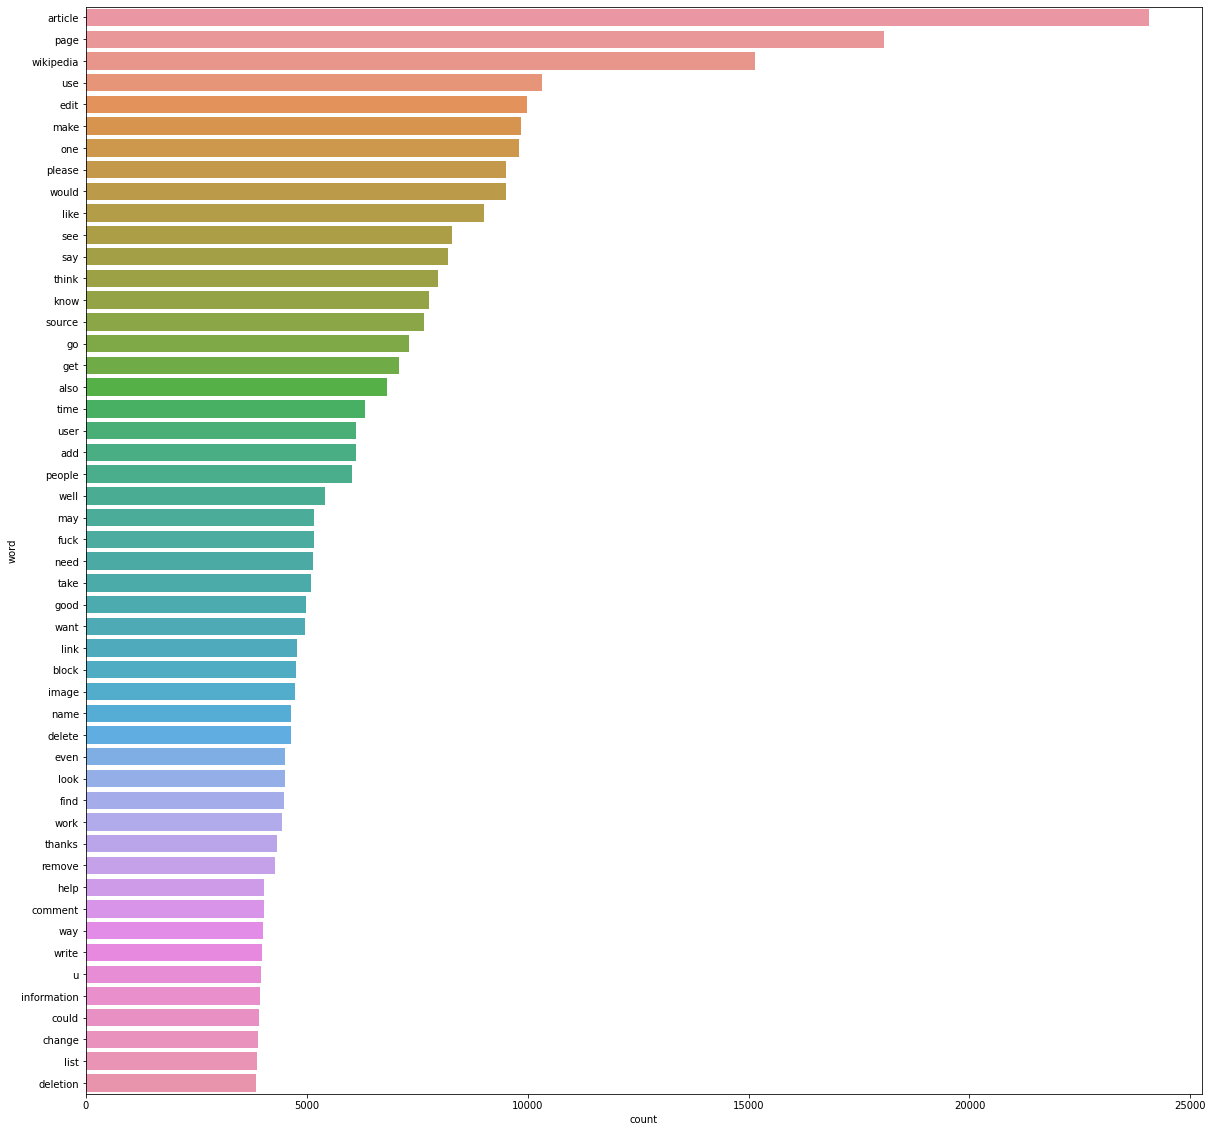

In [ ]:
df_top= df_word.head(50)
fig = plt.figure()
fig.set_size_inches(20, 20)
sns.barplot(df_top['count'],df_top['word'])

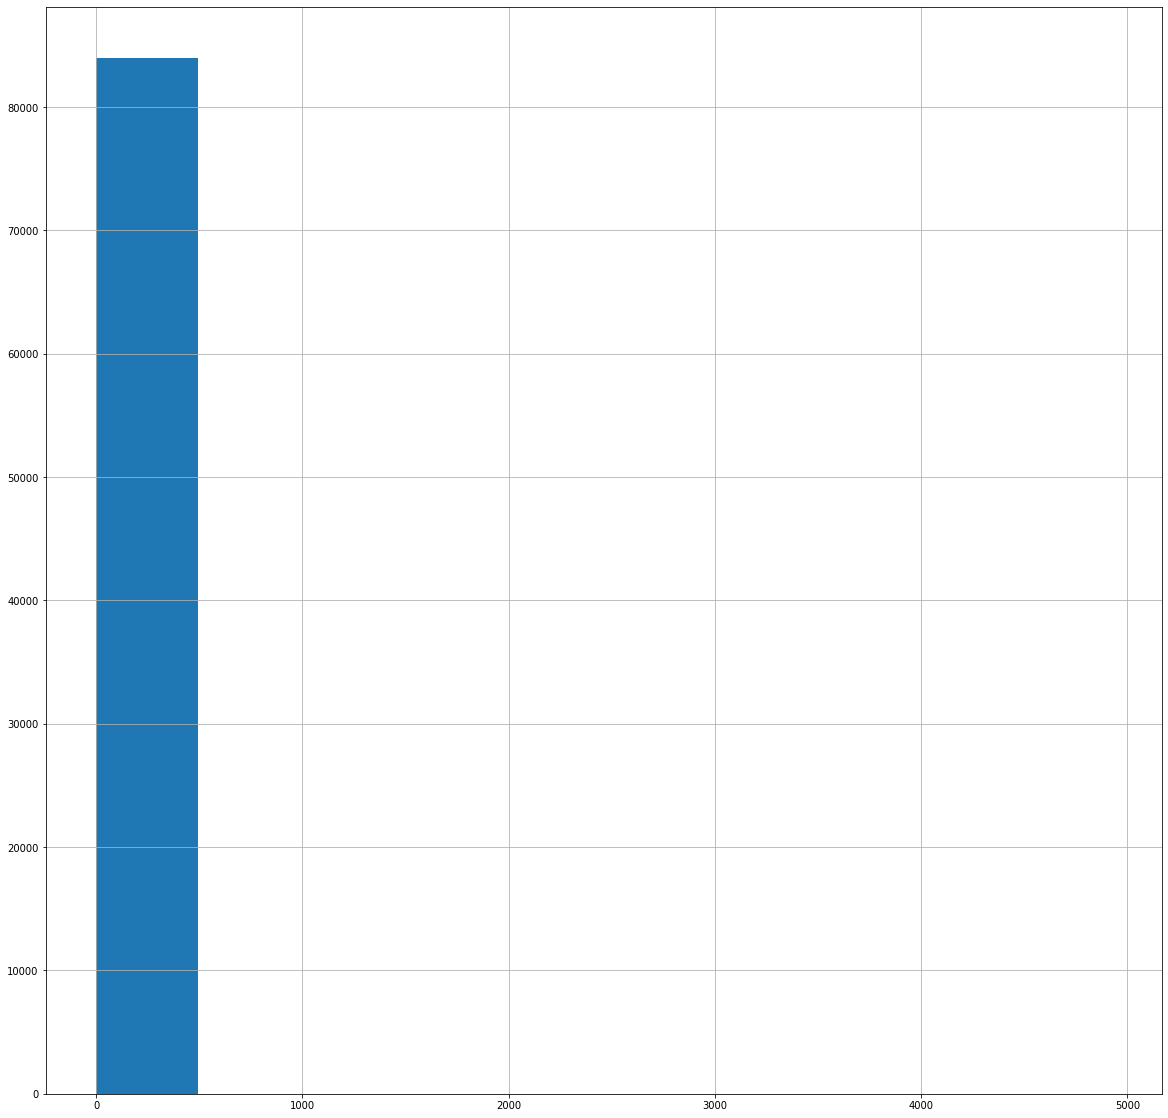

In [ ]:
fig = plt.figure()
fig.set_size_inches(20, 20)
df_word['word_len'].hist()

In [ ]:
df_word[df_word['word_len']==max(df_word['word_len'])]

,word,count,word_len
63710,gaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,1,4920


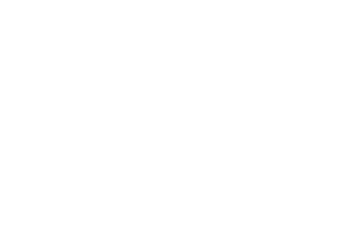

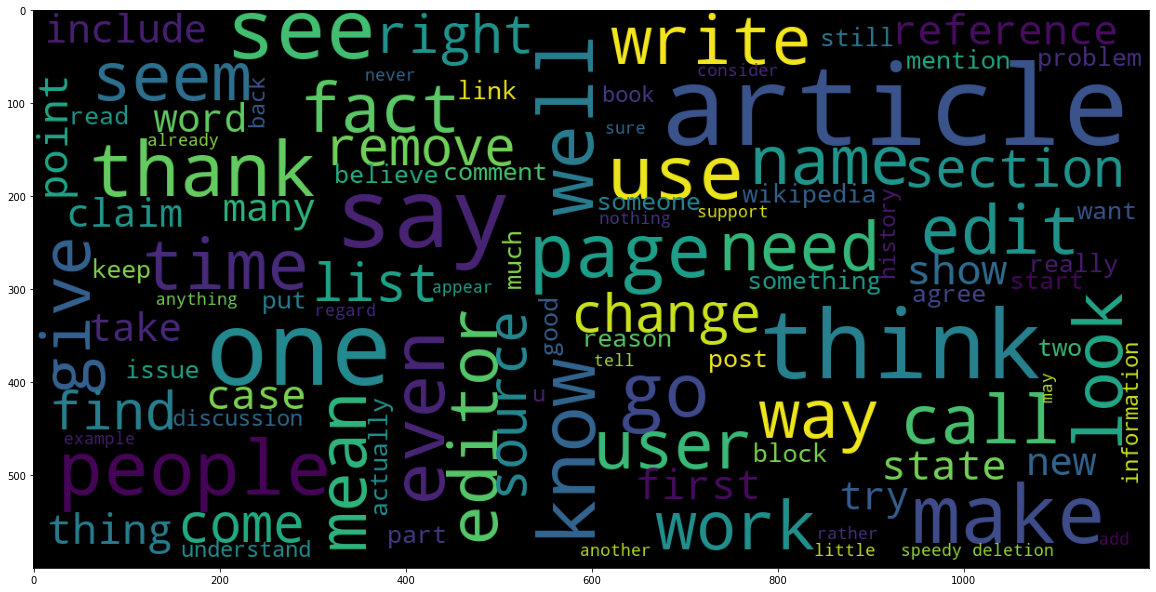

In [ ]:
wordcloud = WordCloud(background_color='black',max_words=100 ,max_font_size=40 ,scale=3,random_state=1).generate(text)
plt.axis("off")
fig = plt.figure()
fig.set_size_inches(20, 20)
plt.imshow(wordcloud)

In [ ]:
df.to_csv('toxiccomments.csv')